<a href="https://colab.research.google.com/github/SuvitKumar003/Clustering_Assignment_UCS654/blob/main/Clustring_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.impute import SimpleImputer

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_df = pd.read_csv(url, sep=';')

In [3]:
print("Shape:", wine_df.shape)
print(wine_df.head())

Shape: (1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2 

In [4]:
X = wine_df.drop(columns=['quality'])


In [7]:
imputer = SimpleImputer(strategy="mean")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [8]:
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}


In [9]:
cluster_algorithms = {
    'KMeans': lambda n: KMeans(n_clusters=n, random_state=42),
    'Agglomerative': lambda n: AgglomerativeClustering(n_clusters=n),
    'DBSCAN': lambda _: DBSCAN(eps=1.5, min_samples=5)  # tuned eps
}


In [10]:
results = []


In [11]:
for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)

    for algo_name, algo_fn in cluster_algorithms.items():
        if algo_name == 'DBSCAN':
            model = algo_fn(None)
            labels = model.fit_predict(X_scaled)
            if len(set(labels)) > 1 and len(set(labels)) < len(X):
                sil = silhouette_score(X_scaled, labels)
                dbi = davies_bouldin_score(X_scaled, labels)
            else:
                sil, dbi = -1, -1
            results.append([scaler_name, algo_name, "Auto", sil, dbi])
        else:
            for n_clusters in [2, 3, 4, 5, 6]:
                model = algo_fn(n_clusters)
                labels = model.fit_predict(X_scaled)
                sil = silhouette_score(X_scaled, labels)
                dbi = davies_bouldin_score(X_scaled, labels)
                results.append([scaler_name, algo_name, n_clusters, sil, dbi])


In [12]:
results_df = pd.DataFrame(results, columns=[
    'Preprocessing', 'Algorithm', 'No. of Clusters', 'Silhouette Score', 'Davies-Bouldin Index'
])

In [13]:
display(results_df.sort_values(by='Silhouette Score', ascending=False))


,Preprocessing,Algorithm,No. of Clusters,Silhouette Score,Davies-Bouldin Index
27,RobustScaler,Agglomerative,2,0.759119,0.364074
28,RobustScaler,Agglomerative,3,0.671170,0.595864
23,RobustScaler,KMeans,3,0.524611,0.844486
22,RobustScaler,KMeans,2,0.522365,0.975186
24,RobustScaler,KMeans,4,0.452114,0.959201
29,RobustScaler,Agglomerative,4,0.375858,1.282925
30,RobustScaler,Agglomerative,5,0.358454,1.063160
25,RobustScaler,KMeans,5,0.345395,1.102879
11,MinMaxScaler,KMeans,2,0.244505,1.618266
16,MinMaxScaler,Agglomerative,2,0.234640,1.686332


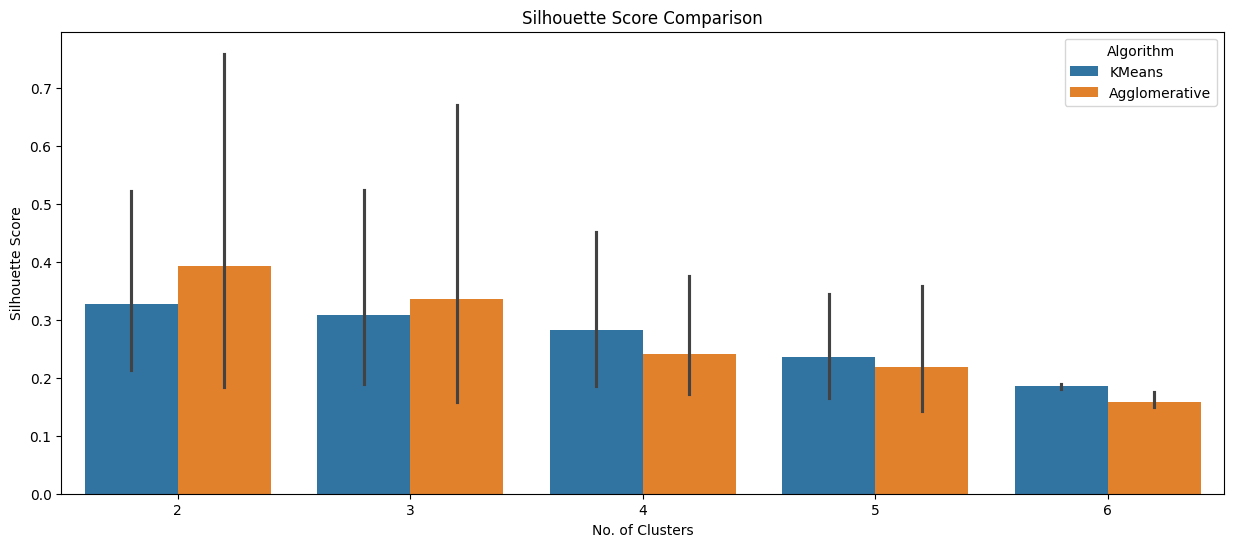

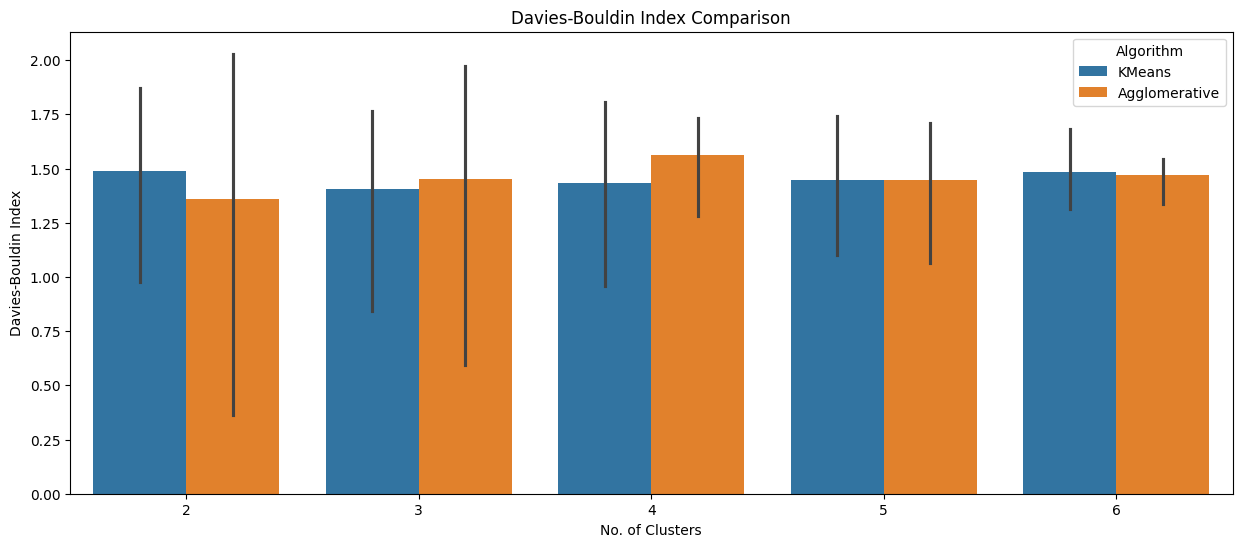

In [14]:
plt.figure(figsize=(15, 6))
sns.barplot(data=results_df[results_df['No. of Clusters'] != "Auto"],
            x='No. of Clusters', y='Silhouette Score', hue='Algorithm')
plt.title("Silhouette Score Comparison")
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(data=results_df[results_df['No. of Clusters'] != "Auto"],
            x='No. of Clusters', y='Davies-Bouldin Index', hue='Algorithm')
plt.title("Davies-Bouldin Index Comparison")
plt.show()

In [ ]:
# Clustering Assignment - Colab Version
# Author: Suvit Kumar

# 📦 Install and Import Required Libraries


# 🌸 Load Dataset (Iris from UCI)
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# 🔍 Preprocessing Techniques
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# 🔁 Clustering Algorithms
cluster_algorithms = {
    'KMeans': lambda n: KMeans(n_clusters=n, random_state=42),
    'Agglomerative': lambda n: AgglomerativeClustering(n_clusters=n),
    'DBSCAN': lambda _: DBSCAN(eps=0.5, min_samples=5)  # n ignored
}

# 📊 Evaluation Storage
results = []

# 🧪 Perform Clustering with various scalers, algorithms, and clusters
for scaler_name, scaler in scalers.items():
    X_scaled = scaler.fit_transform(X)

    for algo_name, algo_fn in cluster_algorithms.items():
        if algo_name == 'DBSCAN':
            model = algo_fn(None)
            labels = model.fit_predict(X_scaled)
            if len(set(labels)) > 1:
                sil = silhouette_score(X_scaled, labels)
                dbi = davies_bouldin_score(X_scaled, labels)
            else:
                sil, dbi = -1, -1
            results.append([scaler_name, algo_name, "Auto", sil, dbi])
        else:
            for n_clusters in [2, 3, 4, 5]:
                model = algo_fn(n_clusters)
                labels = model.fit_predict(X_scaled)
                sil = silhouette_score(X_scaled, labels)
                dbi = davies_bouldin_score(X_scaled, labels)
                results.append([scaler_name, algo_name, n_clusters, sil, dbi])

# 🧾 Result DataFrame
results_df = pd.DataFrame(results, columns=[
    'Preprocessing', 'Algorithm', 'No. of Clusters', 'Silhouette Score', 'Davies-Bouldin Index'
])

# 📈 Display Results
display(results_df.sort_values(by='Silhouette Score', ascending=False))

# 📉 Graphical Analysis
plt.figure(figsize=(15, 6))
sns.barplot(data=results_df, x='No. of Clusters', y='Silhouette Score', hue='Algorithm')
plt.title("Silhouette Score across Clustering Algorithms")
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(data=results_df, x='No. of Clusters', y='Davies-Bouldin Index', hue='Algorithm')
plt.title("Davies-Bouldin Index across Clustering Algorithms")
plt.show()
